In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay # visualize CM computed

In [147]:
def make_plot(path2data_list, legend, legend_anchor = (0.01, 1.3),S_baseline=None, T_baseline=None,acc_range = [0,100], loss_range=[0,1],vloss_range=[0,1],fsize=(10, 5), online=False):
    fig, axs = plt.subplots(2, 2, figsize=fsize)

    for path2data in path2data_list:
        # get the results data (downloaded from tensorboard run as a csv file)
        ValAcc = pd.read_csv(r'{}{}'.format(path2data,'-tag-Accuracy_Top1_valid.csv'))
        LR = pd.read_csv(r'{}{}'.format(path2data,'-tag-LR_Learning rate policy.csv'))
        Train_loss = pd.read_csv(r'{}{}'.format(path2data,'-tag-Loss_train.csv'))
        Valid_loss = pd.read_csv(r'{}{}'.format(path2data,'-tag-Loss_valid.csv'))
        # plot resutls
        axs[0,0].plot(ValAcc['Step']/1000, ValAcc['Value'])
        axs[0,1].plot(LR['Step']/1000, LR['Value'])
        axs[1,0].plot(Train_loss['Step']/1000, Train_loss['Value'])
        axs[1,1].plot(Valid_loss['Step']/1000, Valid_loss['Value'])


          

        if online: # monitor teacher training also
            T_ValAcc = pd.read_csv(r'{}{}'.format(path2data,'-tag-Accuracy_Top1_valid(teacher).csv'))
            T_LR = pd.read_csv(r'{}{}'.format(path2data,'-tag-LR_Learning rate policy(teacher).csv'))
            T_Train_loss = pd.read_csv(r'{}{}'.format(path2data,'-tag-Loss_train(teacher).csv'))
            T_Valid_loss = pd.read_csv(r'{}{}'.format(path2data,'-tag-Loss_valid(teacher).csv'))
            axs[0,0].plot(T_ValAcc['Step']/1000, T_ValAcc['Value'])
            axs[0,1].plot(T_LR['Step']/1000, T_LR['Value'])
            axs[1,0].plot(T_Train_loss['Step']/1000, T_Train_loss['Value'])
            axs[1,1].plot(T_Valid_loss['Step']/1000, T_Valid_loss['Value'])
            
    
    # draw student baseline acc
    if S_baseline != None: 
        S_baseline = S_baseline * np.ones(len(ValAcc['Step']))
        axs[0,0].plot(ValAcc['Step']/1000,S_baseline, 'k')     
    # draw t baseline acc
    if T_baseline != None: 
        T_baseline = T_baseline * np.ones(len(ValAcc['Step']))
        axs[0,0].plot(ValAcc['Step']/1000,T_baseline, 'k')  
        
    # set y axis limits
    axs[0,0].set_ylim(acc_range)
    axs[1,0].set_ylim(loss_range)
    axs[1,1].set_ylim(vloss_range)
    # label axis
    axs[1,0].set_xlabel('Training Iterations (k)')
    axs[1,1].set_xlabel('Training Iterations (k)')
    axs[0,0].set_ylabel('Top-1 Test Accuracy (%)')
    axs[0,1].set_ylabel('Learning Rate Policy')
    axs[1,0].set_ylabel('Training Loss')
    axs[1,1].set_ylabel('Validation Loss')
    axs[0,1].legend(legend, bbox_to_anchor=legend_anchor)
    axs[0,0].grid(which='major', axis='both', linestyle='-')
    axs[0,1].grid(which='major', axis='both', linestyle='-')
    axs[1,0].grid(which='major', axis='both', linestyle='-')
    axs[1,1].grid(which='major', axis='both', linestyle='-')




In [132]:
def make_plot_stage1(path2data_list, legend, legend_anchor = (0.01, 1.3),loss_range=[0,1],fsize=(10, 5)):
    fig, axs = plt.subplots(1, 2, figsize=fsize)
    for path2data in path2data_list:
        S1_LR = pd.read_csv(r'{}{}'.format(path2data,'-tag-LR_Learning rate policy (stage-1).csv'))
        S1_Train_loss = pd.read_csv(r'{}{}'.format(path2data,'-tag-Loss_train (stage-1).csv'))
        axs[0].plot(S1_Train_loss['Step']/1000, S1_Train_loss['Value'])
        axs[1].plot(S1_LR['Step']/1000, S1_LR['Value'])


    # label axis
    axs[0].set_xlabel('Training Iterations (k)')
    axs[1].set_xlabel('Training Iterations (k)')
    axs[0].set_ylabel('Training Loss')
    axs[1].set_ylabel('Learning Rate Policy')
    axs[0].grid(which='major', axis='both', linestyle='-')
    axs[1].grid(which='major', axis='both', linestyle='-')
    axs[0].legend(legend, bbox_to_anchor=legend_anchor)
                    


In [164]:
def make_plot_simple(path2data_list, legend, legend_anchor = (0.01, 1.3), acc_range = [0,100], fsize=(7, 5),S_baseline=None, T_baseline=None):
    plt.figure(figsize=fsize)
    for path2data in path2data_list:
        
        # get the results data (downloaded from tensorboard run as a csv file)
        ValAcc = pd.read_csv(r'{}{}'.format(path2data,'-tag-Accuracy_Top1_valid.csv'))

        plt.plot(ValAcc['Step']/1000, ValAcc['Value'])

    # draw student baseline acc
    if S_baseline != None: 
        S_baseline = S_baseline * np.ones(len(ValAcc['Step']))
        plt.plot(S_baseline, linestyle='dashed',color='black')  
    # draw t baseline acc
    if T_baseline != None: 
        T_baseline = T_baseline * np.ones(len(ValAcc['Step']))
        plt.plot(T_baseline, linestyle='dashed', color='black')  
    
    # set y axis limits
    plt.ylim(acc_range)
    plt.xlim([0,200])
    
    # label axis
    plt.xlabel('Training Iterations (k)')
    plt.ylabel('Top-1 Test Accuracy (%)')
    plt.legend(legend, bbox_to_anchor=legend_anchor)
    
    plt.grid(which='major', axis='both', linestyle='-')
    plt.grid(which='major', axis='both', linestyle='-')
    plt.grid(which='major', axis='both', linestyle='-')
    plt.grid(which='major', axis='both', linestyle='-')

# 4.1 From scratch training

350


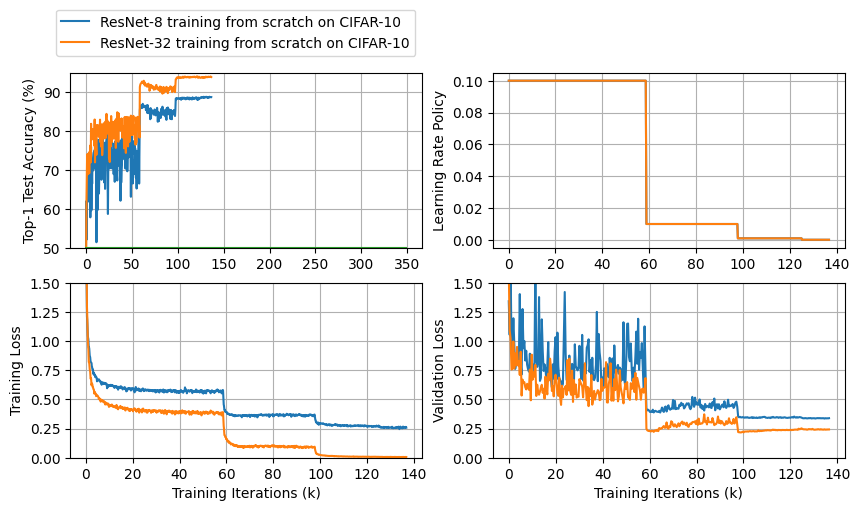

In [89]:
path2data_list = [
    'Results/pretrain/run-pretrains_ResNet-8_from-scratch_CIFAR-10',
    'Results/pretrain/run-pretrains_ResNet-32_from-scratch_CIFAR-10',

]
legend = [
    'ResNet-8 training from scratch on CIFAR-10',
    'ResNet-32 training from scratch on CIFAR-10',
]
make_plot(path2data_list, legend,legend_anchor=(-.2, 1.4), acc_range=[50,95], loss_range=[0,1.5], vloss_range=[0,1.5])

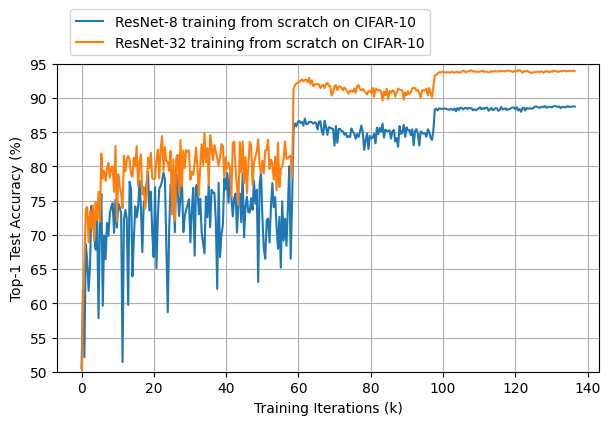

In [5]:
make_plot_simple(path2data_list, legend,legend_anchor=(0.7, 1.2), acc_range=[50,95], fsize=(7,4))

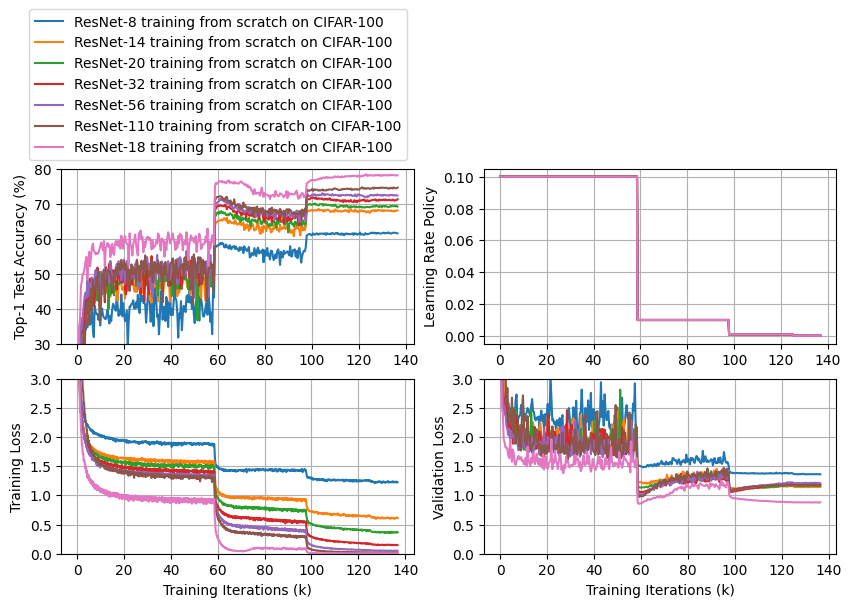

In [22]:
path2data_list = [
    'Results/pretrain/run-pretrains_ResNet-8_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_ResNet-14_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_ResNet-20_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_ResNet-32_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_ResNet-56_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_ResNet-110_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_ResNet-18_from-scratch_CIFAR-100'
]
legend = [
    'ResNet-8 training from scratch on CIFAR-100',
    'ResNet-14 training from scratch on CIFAR-100',
    'ResNet-20 training from scratch on CIFAR-100',
    'ResNet-32 training from scratch on CIFAR-100',
    'ResNet-56 training from scratch on CIFAR-100',
    'ResNet-110 training from scratch on CIFAR-100',
    'ResNet-18 training from scratch on CIFAR-100'
]
make_plot(path2data_list, legend, legend_anchor=(-0.2, 1.95), acc_range=[30,80], loss_range=[0,3], vloss_range=[0.3])

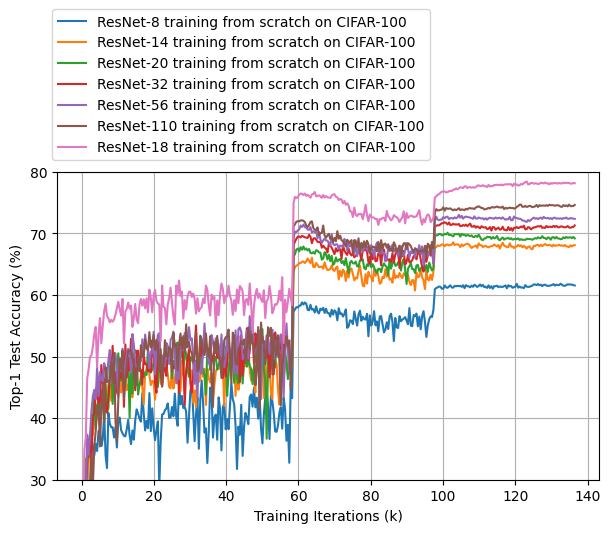

In [7]:
make_plot_simple(path2data_list, legend,legend_anchor=(0.7, 1.55), acc_range=[30,80], fsize=(7,4))

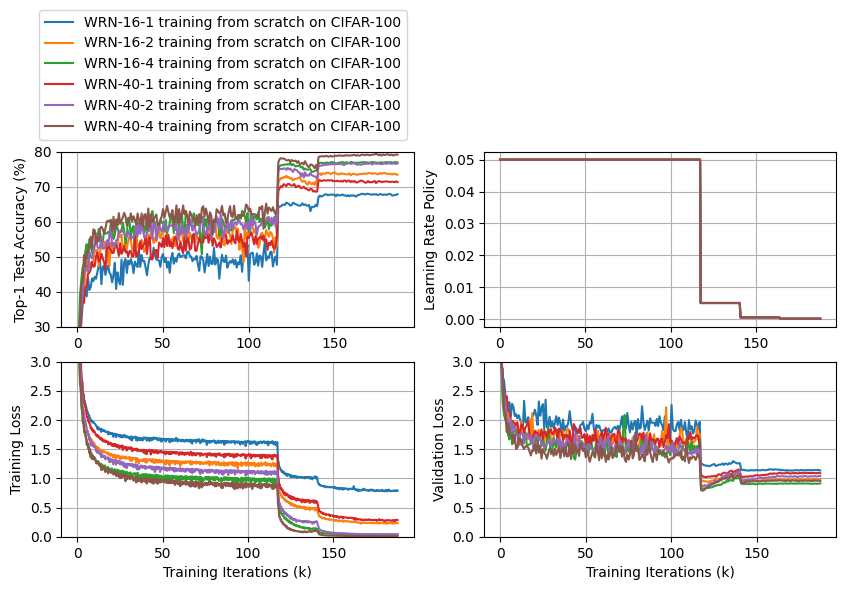

In [31]:
path2data_list = [
    'Results/pretrain/run-pretrains_WRN-16-1_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_WRN-16-2_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_WRN-16-4_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_WRN-40-1_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_WRN-40-2_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_WRN-40-4_from-scratch_CIFAR-100',
]
legend = [
    'WRN-16-1 training from scratch on CIFAR-100',
    'WRN-16-2 training from scratch on CIFAR-100',
    'WRN-16-4 training from scratch on CIFAR-100',
    'WRN-40-1 training from scratch on CIFAR-100',
    'WRN-40-2 training from scratch on CIFAR-100',
    'WRN-40-4 training from scratch on CIFAR-100'
]
make_plot(path2data_list, legend, legend_anchor=(-0.2, 1.85), acc_range=[30,80], loss_range=[0,3])

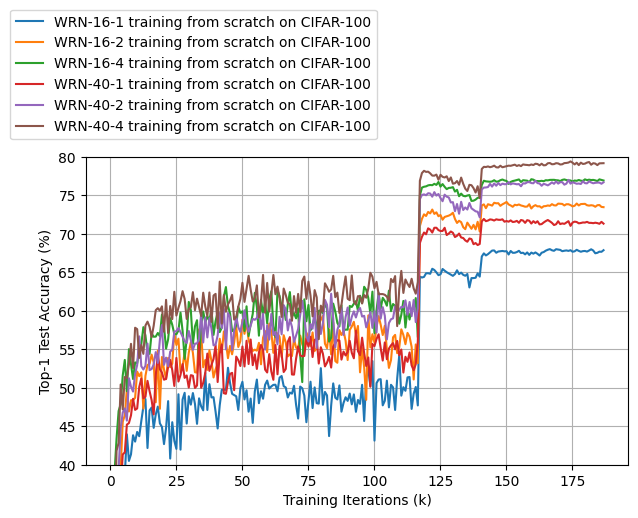

In [9]:
make_plot_simple(path2data_list, legend,legend_anchor=(0.55, 1.5), acc_range=[40,80], fsize=(7,4))

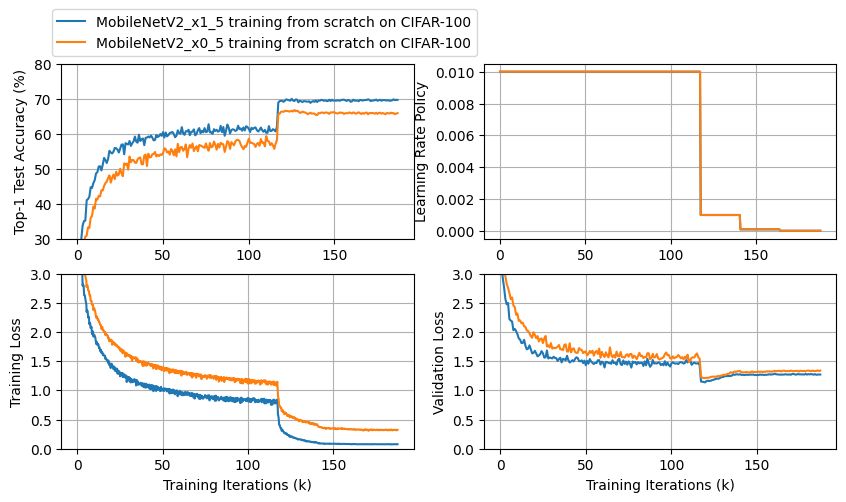

In [30]:
path2data_list = [
    'Results/pretrain/run-pretrains_MobileNetV2_x1_0_from-scratch_CIFAR-100',
    'Results/pretrain/run-pretrains_MobileNetV2_x0_5_from-scratch_CIFAR-100',
]
legend = [
    'MobileNetV2_x1_5 training from scratch on CIFAR-100',
    'MobileNetV2_x0_5 training from scratch on CIFAR-100'
]
make_plot(path2data_list, legend, legend_anchor=(-0, 1.35), acc_range=[30,80], loss_range=[0,3])

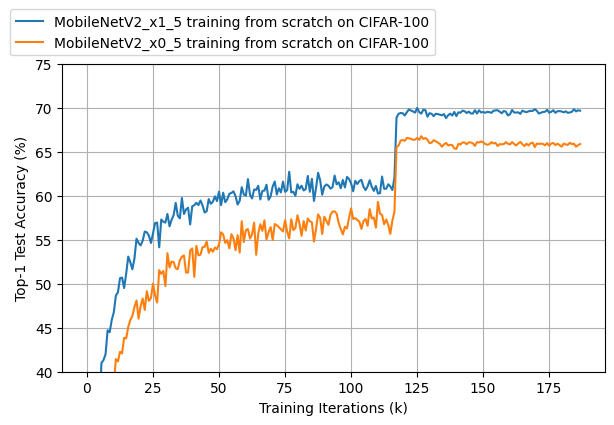

In [11]:
make_plot_simple(path2data_list, legend,legend_anchor=(0.7, 1.2), acc_range=[40,75], fsize=(7,4))

## Acc vs model cost trade off

In [12]:
models = [ # mode names 
'ResNet-8','ResNet-14','ResNet-20','ResNet-32','ResNet-56','ResNet-110',
'WRN-16-1','WRN-16-2','WRN-16-4','WRN-40-1','WRN-40-2','WRN-40-4',
'ResNet-18',
'MobileNetV2_(x1.0)','MobileNetV2_(x0.5)'
] 
sizes = [ # number of model parameters
0.083892,0.181108,0.278324,0.472756,0.861620,1.736564,
0.180916,0.703284,2.772020,0.569780,2.255156,8.972340,
11.22,
2.35,0.81,
]
com_cost = [ # number of MACs per inference 
12.51,26.66,40.82,69.13,125.76,253.16,
26.66,101.12,392.64,83.29,327.62,1300,
555.48,
22.42,6.54
]
TestAcc = [ # cifar-100 test acc@1 (from-scratch)
61.53,68.08,69.18,71.28,72.34,74.61,
67.85,73.45,76.91,71.3,76.68,79.16,
78.13,
69.66,65.87
]

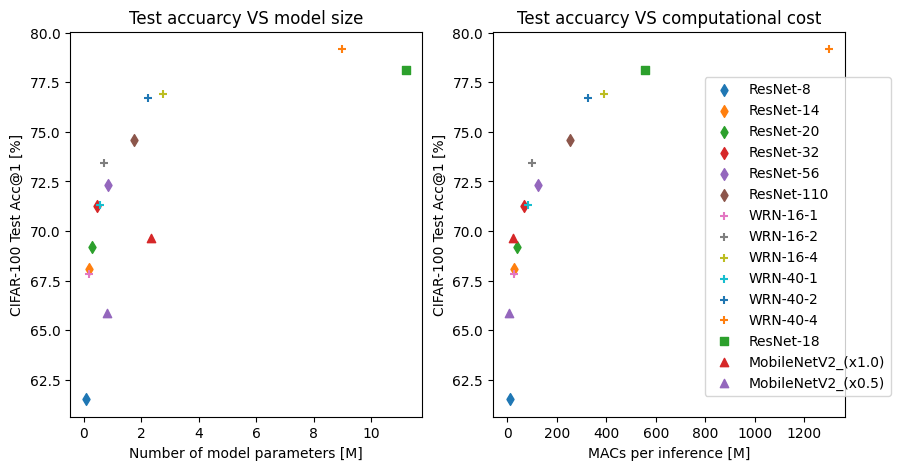

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))

for i in range(len(models)):
    
    name = models[i]
    size = sizes[i]
    cost = com_cost[i]
    acc = TestAcc[i]

    # acc vs model size 
    if name.split('-')[0] == 'ResNet' and name.split('-')[1] not in ['18','50']:
        axs[0].scatter(size, acc, marker='d')
    elif name.split('-')[0] == 'WRN':
        axs[0].scatter(size, acc, marker='+')
    elif name.split('-')[0] == 'ResNet' and name.split('-')[1] in ['18','50']:
        axs[0].scatter(size, acc, marker='s')
    elif name.split('_')[0] == 'MobileNetV2':
        axs[0].scatter(size, acc, marker='^')
    
    axs[0].set_xlabel('Number of model parameters [M]')
    axs[0].set_ylabel('CIFAR-100 Test Acc@1 [%]')
    axs[0].set_title('Test accuarcy VS model size')

    # acc vs computational cost
    if name.split('-')[0] == 'ResNet' and name.split('-')[1] not in ['18','50']:
        axs[1].scatter(cost, acc, marker='d')
    elif name.split('-')[0] == 'WRN':
        axs[1].scatter(cost, acc, marker='+')
    elif name.split('-')[0] == 'ResNet' and name.split('-')[1] in ['18','50']:
        axs[1].scatter(cost, acc, marker='s')
    elif name.split('_')[0] == 'MobileNetV2':
        axs[1].scatter(cost, acc, marker='^')
    
    axs[1].set_xlabel('MACs per inference [M]')
    axs[1].set_ylabel('CIFAR-100 Test Acc@1 [%]')
    axs[1].set_title('Test accuarcy VS computational cost')
    axs[1].legend(models,bbox_to_anchor=(1.15,0.9))

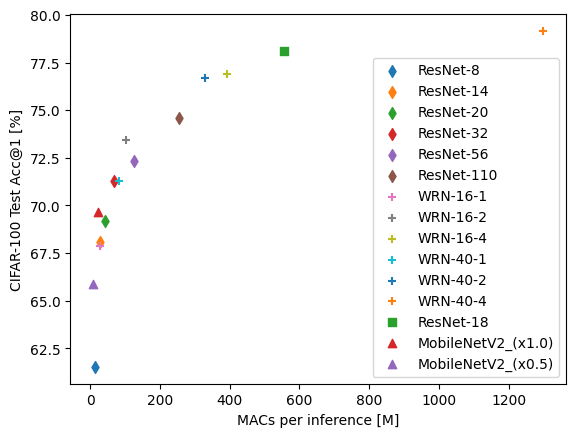

In [14]:
for i in range(len(models)):
    name = models[i]
    size = sizes[i]
    cost = com_cost[i]
    acc = TestAcc[i]

    if name.split('-')[0] == 'ResNet' and name.split('-')[1] not in ['18','50']:
        plt.scatter(cost, acc, marker='d')
    elif name.split('-')[0] == 'WRN':
        plt.scatter(cost, acc, marker='+')
    elif name.split('-')[0] == 'ResNet' and name.split('-')[1] in ['18','50']:
        plt.scatter(cost, acc, marker='s')
    elif name.split('_')[0] == 'MobileNetV2':
        plt.scatter(cost, acc, marker='^')
    
    plt.xlabel('MACs per inference [M]')
    plt.ylabel('CIFAR-100 Test Acc@1 [%]')

plt.legend(models)

# 4.3 Testing Implementation of KD methods
### (T)WRN-40-4 -> (S)WRN-16-4 on CIFAR-10

### KD test

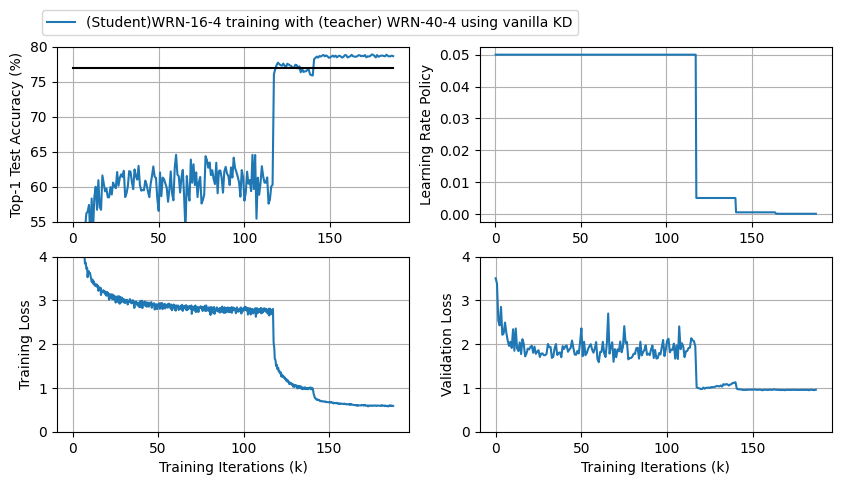

In [115]:
path2data_list = [
    'Results/test/KD/run-test_KD_WRN-16-4_KD_Hinton_WRN-40-4_CIFAR-100'
]
legend = [
    '(Student)WRN-16-4 training with (teacher) WRN-40-4 using vanilla KD',
    'baseline student'
]
make_plot(path2data_list, legend, legend_anchor=(0.3, 1.25), acc_range=[55,80], loss_range=[0,4], vloss_range=[0,4], S_baseline=76.91)

### FitNet test

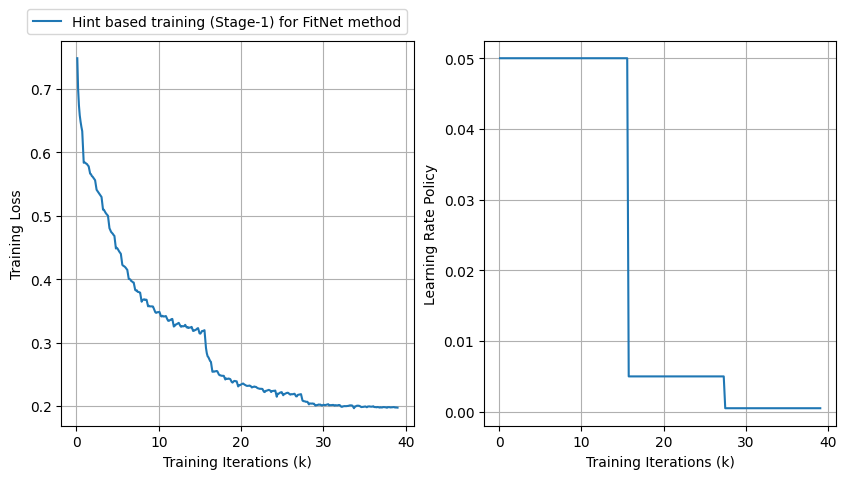

In [64]:
path2data_list = [
    'Results/test/FitNet/run-test_FitNet_WRN-16-4_FitNet_WRN-40-4_CIFAR-100'
]
legend = [
    'Hint based training (Stage-1) for FitNet method'
]
make_plot_stage1(path2data_list, legend, legend_anchor=(1, 1.1), loss_range=[0,4])

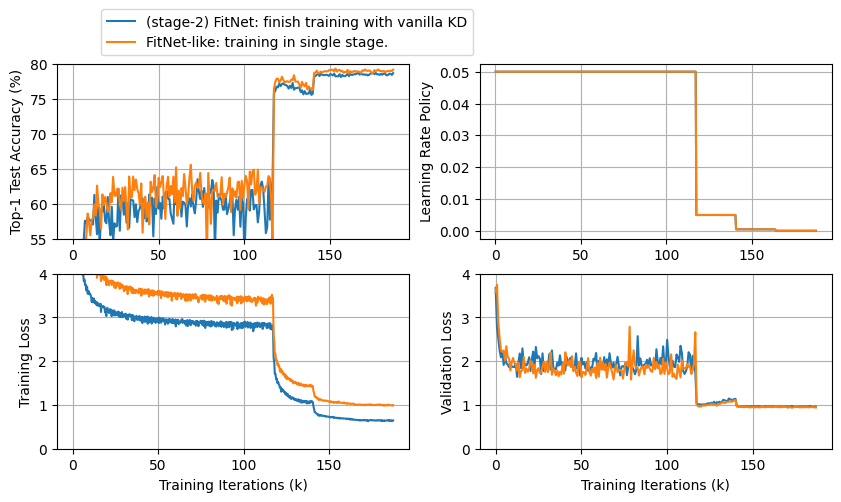

In [33]:
path2data_list = [
    'Results/test/FitNet/run-test_FitNet_WRN-16-4_FitNet_WRN-40-4_CIFAR-100',
    'Results/test/FitNet/run-test_FitNet_WRN-16-4_FitNet-like_WRN-40-4_CIFAR-100'
]
legend = [
    '(stage-2) FitNet: finish training with vanilla KD',
    'FitNet-like: training in single stage.'
]
make_plot(path2data_list, legend, legend_anchor=(-0, 1.35), acc_range=[55,80], loss_range=[0,4], vloss_range=[0,4])

### AT test

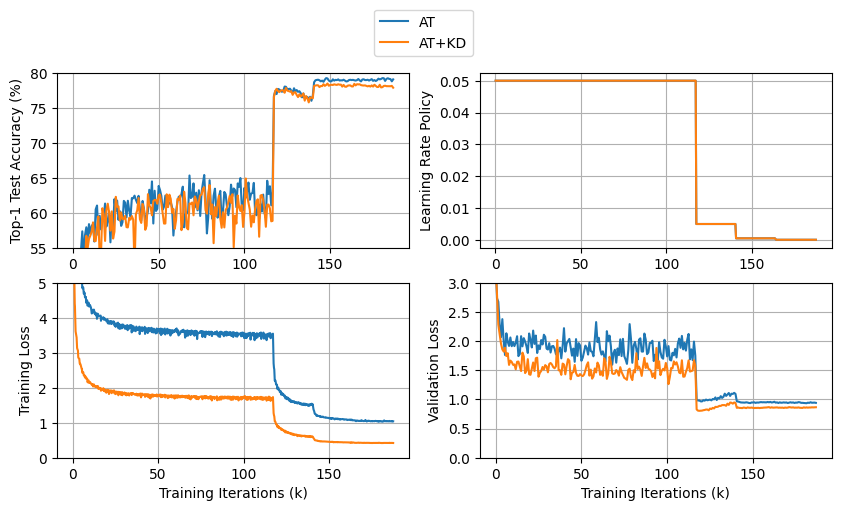

In [174]:
path2data_list = [
    'Results/test/AT/run-test_AT_WRN-16-4_AT_WRN-40-4_CIFAR-100',
    'Results/test/AT/run-test_ATnoKD_WRN-16-4_AT_WRN-40-4_CIFAR-100',
]
legend = [
    'AT',
    'AT+KD'
]
make_plot(path2data_list, legend, legend_anchor=(0, 1.4), acc_range=[55,80], loss_range=[0,5], vloss_range=[0,3])

### DML test

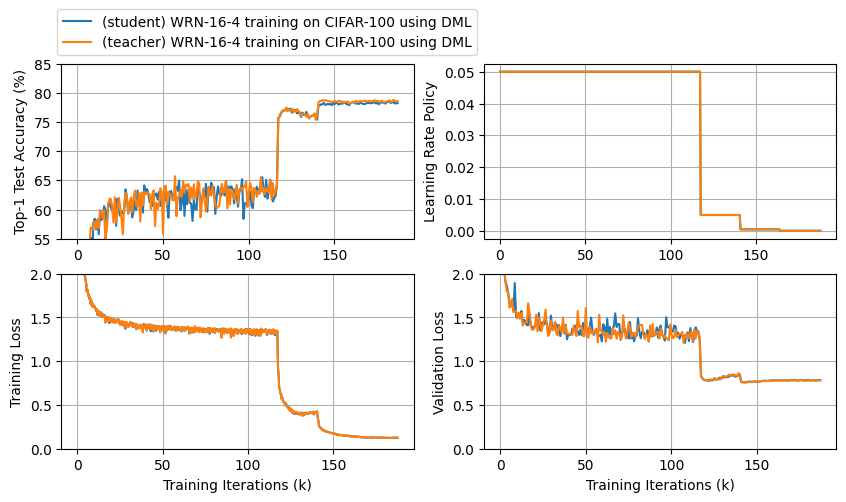

In [50]:
path2data_list = [
    'Results/test/DML/run-testDML_WRN-16-4_DML_WRN-16-4_CIFAR-100',
]
legend = [
    '(student) WRN-16-4 training on CIFAR-100 using DML',
    '(teacher) WRN-16-4 training on CIFAR-100 using DML',
]
make_plot(path2data_list, legend, legend_anchor=(-0, 1.35), acc_range=[55,85], loss_range=[0,2], online=True)

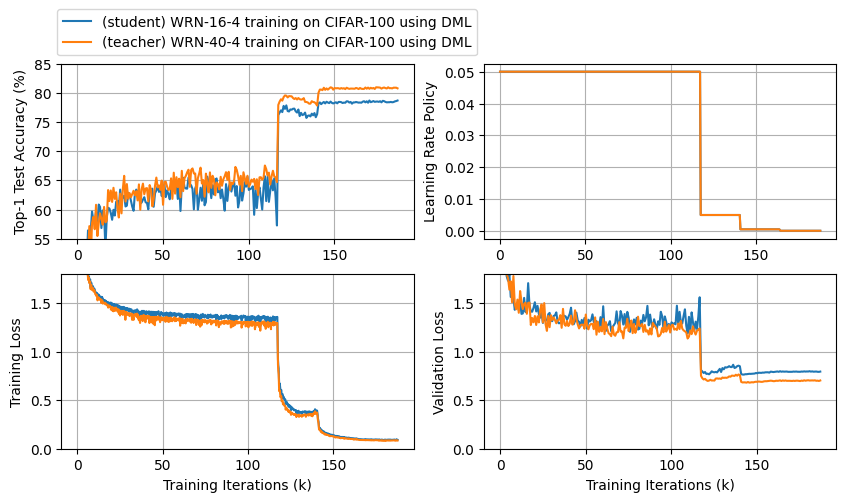

In [51]:
path2data_list = [
    'Results/test/DML/run-testDML_WRN-16-4_DML_WRN-40-4_CIFAR-100',
]
legend = [
    '(student) WRN-16-4 training on CIFAR-100 using DML',
    '(teacher) WRN-40-4 training on CIFAR-100 using DML',
]
make_plot(path2data_list, legend, legend_anchor=(-0, 1.35), acc_range=[55,85], loss_range=[0,1.8], online=True)

### SRDwithDIST test
#### SRD vs DIST vs SRDwithDIST

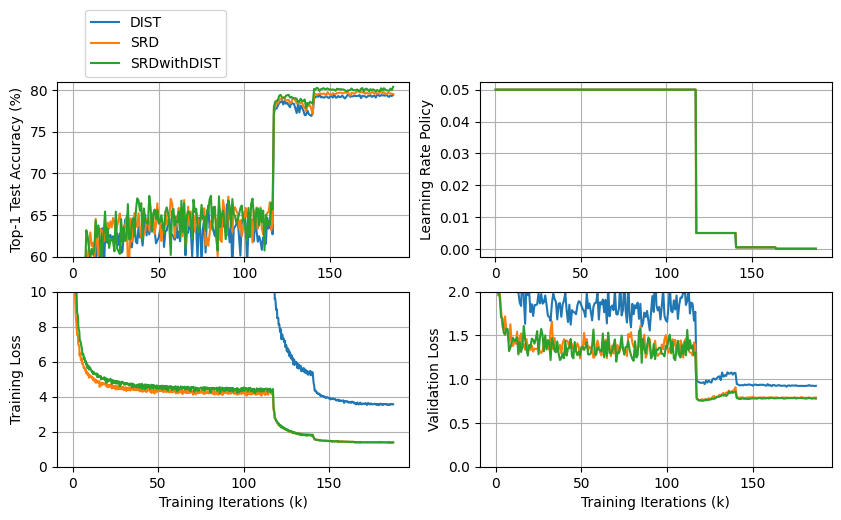

In [175]:
path2data_list = [
    'Results/test/SRDwithDIST/run-testDIST_WRN-16-4_DIST_WRN-40-4_CIFAR-100',
    'Results/test/SRDwithDIST/run-testSRD_WRN-16-4_SRD_WRN-40-4_CIFAR-100',
    'Results/test/SRDwithDIST/run-testSRDwithDIST_WRN-16-4_SRDwithDIST_WRN-40-4_CIFAR-100'
]
legend = [
    'DIST',
    'SRD',
    'SRDwithDIST'
]
make_plot(path2data_list, legend, legend_anchor=(-0.7, 1.45), acc_range=[60,81], loss_range=[0,10], vloss_range=[0,2])

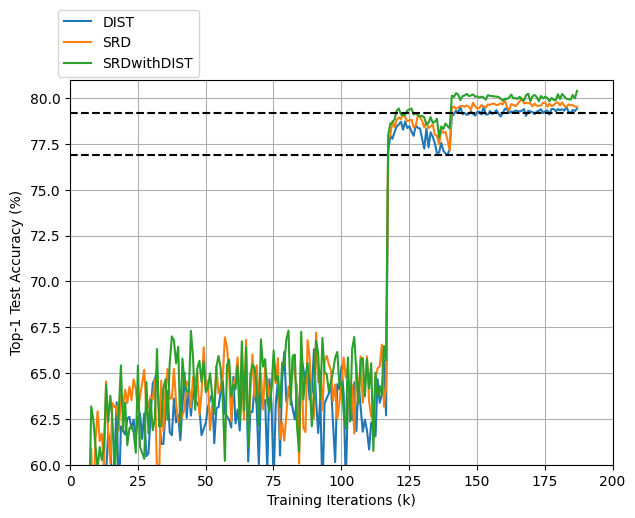

In [177]:
path2data_list = [
    'Results/test/SRDwithDIST/run-testDIST_WRN-16-4_DIST_WRN-40-4_CIFAR-100',
    'Results/test/SRDwithDIST/run-testSRD_WRN-16-4_SRD_WRN-40-4_CIFAR-100',
    'Results/test/SRDwithDIST/run-testSRDwithDIST_WRN-16-4_SRDwithDIST_WRN-40-4_CIFAR-100'
]
legend = [
    'DIST',
    'SRD',
    'SRDwithDIST'
]
make_plot_simple(path2data_list, legend, legend_anchor = (0.25, 1.2), acc_range = [60,81], fsize=(7, 5), S_baseline=76.91, T_baseline=79.16)

# 5.1 Consistent Teacher

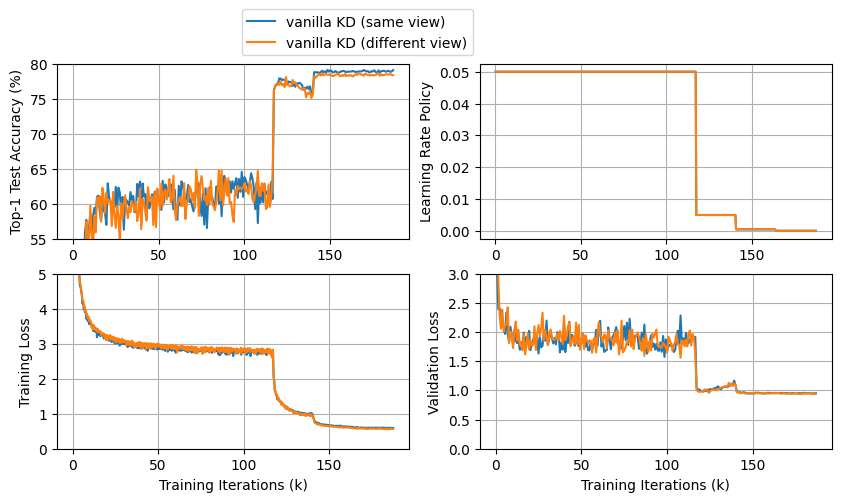

In [87]:
path2data_list = [
    'Results/consistent/run-consistent_KD_WRN-16-4_KD_Hinton_WRN-40-4_CIFAR-100',
    'Results/consistent/run-inconsistent_KD_WRN-16-4_KD_Hinton_WRN-40-4_CIFAR-100'
]
legend = [
    'vanilla KD (same view)',
    'vanilla KD (different view)'
]
make_plot(path2data_list, legend, legend_anchor=(-0, 1.35), acc_range=[55,80], loss_range=[0,5],vloss_range=[0,3])

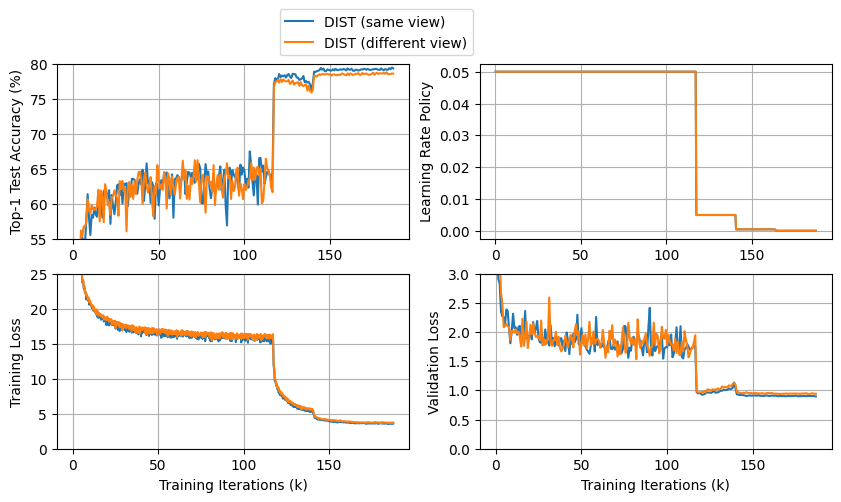

In [83]:
path2data_list = [
    'Results/consistent/run-consistent_DIST_WRN-16-4_DIST_WRN-40-4_CIFAR-100',
    'Results/consistent/run-inconsistent_DIST_WRN-16-4_DIST_WRN-40-4_CIFAR-100'
]
legend = [
    'DIST (same view)',
    'DIST (different view)'
]
make_plot(path2data_list, legend, legend_anchor=(-0, 1.35), acc_range=[55,80], loss_range=[0,25], vloss_range=[0,3])

# 5.2 Capacity Gap

# 5.3 Compare KD methods